<a href="https://colab.research.google.com/github/ahnjonghyunn/ABC/blob/main/Minist_%EC%86%90%EA%B8%80%EC%94%A8_0~9%EA%B9%8C%EC%A7%80_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 손글씨 0~9까지 예측하기

##1 데이터 준비하기

In [ ]:
from keras.datasets.mnist import load_data #케라스 로드 데이터함수

# 텐서플로우 저장소에서 데이터 다운로드
(x_train,y_train),(x_test,y_test) = load_data(path='mnist.npz')


### 데이터 형태 확인하기

In [ ]:
# 훈련 데이터셋
print(x_train.shape, y_train.shape)
print(y_train)

# 테스트 데이터셋
print(x_test.shape, y_test.shape)
print(y_test)


(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

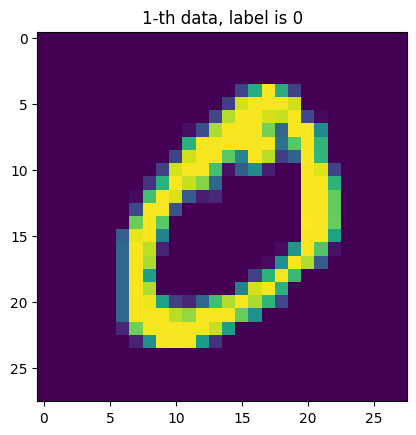

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

idx = 1  #다른값들 확인해보기 0~9
img = x_train[idx, :]
label = y_train[idx]
plt.figure()
plt.imshow(img)
plt.title('%d-th data, label is %d' % (idx, label));


##2 훈련데이터 검증데이터 만들기

train / val(검증) 쪽지시험(학습이용 x)
     70     30


In [ ]:
from sklearn.model_selection import train_test_split

#훈련/검증 데이터 셋 분리 (70:30)

x_train, x_val, y_train, y_val=train_test_split(x_train,y_train, test_size= 0.3,random_state=777)

print('훈련 데이터셋', x_train.shape)
print('검증 데이터셋', x_val.shape)


훈련 데이터셋 (42000, 28, 28)
검증 데이터셋 (18000, 28, 28)


##3 학습 데이터 모델 입력을 위한 전처리

1. 2차원 배열 ->1차원 배열로 변경
2. 스케일링

In [ ]:
# 1차원 배열로 변경
num_x_train = x_train.shape[0] #42000
num_x_val = x_val.shape[0] #18000
num_x_test = x_test.shape[0] #10000

#2차원 배열 -> 1차원 배열로 변경(28 * 28 = 784)
x_train=x_train.reshape((num_x_train, 28*28))
x_val=x_val.reshape((num_x_val, 28*28))
x_test=x_test.reshape((num_x_test, 28*28))

print(x_train.shape)


(42000, 784)


In [ ]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  25, 126, 208, 254, 226,  12,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  15, 211, 254, 253, 253, 253,
       102,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 140, 253, 254, 253,
       253, 253, 185,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 18

In [ ]:
#데이터 스케일링  0~255 -> 0~1 (가장 큰 값(255)으로 나누기)
#여러가지 전처리 방법 - 스케일링
#Normalization(MinMax)  정해진 값일떄 사용
#Robust Noralization  ex) 나이
#standardization 평균의  표준편차로 나눔

x_train = x_train/255
x_val = x_val / 255
x_test = x_test / 255

print(x_train[0])


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.09803922 0.49411765 0.81568627 0.99607843 

##4 모델 입력을 위한 레이블 전처리

In [ ]:
y_train

array([2, 7, 6, ..., 3, 4, 5], dtype=uint8)

In [ ]:
#y_train #숫자를 의미를 인식하는것이 아니라 이미지
# 9 -> 0000000001 범주형
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


##5 모델 구성하기

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation ='relu',input_shape=(784,)))
model.add(Dense(32, activation = 'relu')) #32개의 출력을 가지는 Dense층
model.add(Dense(10, activation = 'softmax')) #다중분류 활성화 함수 SOTA ,10개의 출력을 가지는 신경망

##6 모델 설정하기

In [ ]:
model.compile(optimizer='adam', #옵티마이져:adam
              loss = 'categorical_crossentropy', #손실함수 : categorical_crossentropy
              metrics = ['acc']) #모니터링 할 평가지표 : 정확도

##7 모델 학습하기


In [ ]:
history = model.fit(x_train,y_train, #훈련 데이터 특성,
          epochs=30, # 30번 학습
          batch_size =128, #몇번에 나눠서 학습 할 것인지->128 나눠서 학습
          validation_data=(x_val,y_val)) #검증 데이터



Epoch 1/30
329/329 [==============================] - 7s 13ms/step - loss: 0.5043 - acc: 0.8600 - val_loss: 0.2321 - val_acc: 0.9335
Epoch 2/30
329/329 [==============================] - 4s 12ms/step - loss: 0.2023 - acc: 0.9419 - val_loss: 0.1800 - val_acc: 0.9481
Epoch 3/30
329/329 [==============================] - 5s 14ms/step - loss: 0.1525 - acc: 0.9561 - val_loss: 0.1506 - val_acc: 0.9571
Epoch 4/30
329/329 [==============================] - 3s 9ms/step - loss: 0.1257 - acc: 0.9630 - val_loss: 0.1393 - val_acc: 0.9597
Epoch 5/30
329/329 [==============================] - 2s 7ms/step - loss: 0.1053 - acc: 0.9695 - val_loss: 0.1232 - val_acc: 0.9631
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0899 - acc: 0.9735 - val_loss: 0.1214 - val_acc: 0.9634
Epoch 7/30
329/329 [==============================] - 1s 5ms/step - loss: 0.0768 - acc: 0.9773 - val_loss: 0.1111 - val_acc: 0.9657
Epoch 8/30
329/329 [==============================] - 2s 6ms/step - loss:

##8 성능평가

### 학습 결과 그려보기
epochs 줄여보기
train_acc 집착 x
만나는 지점 최고 높은 곳 0.96정도
데이터 셋을 더 확보하는 것이 가장 좋은방법
train val 지점 만나는 구간 확인

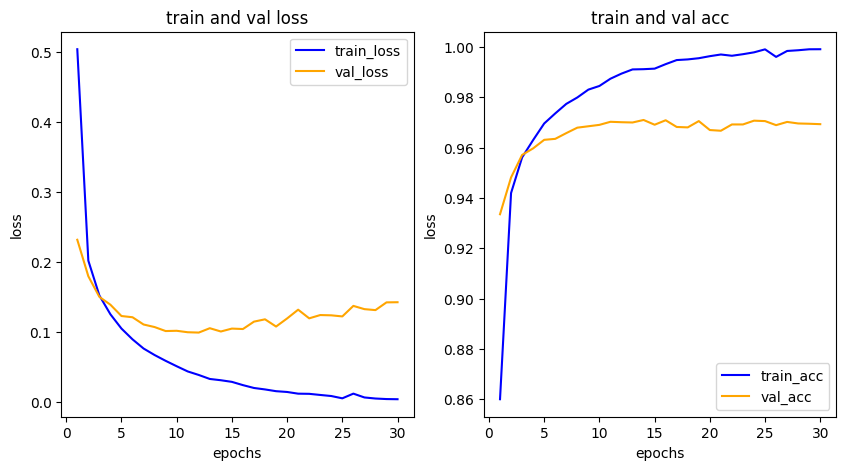

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

### 모델 평가하기

In [ ]:
model.evaluate(x_test, y_test) # 오차, 정확도

313/313 [==============================] - 1s 2ms/step - loss: 0.1435 - acc: 0.9704


[0.14348375797271729, 0.9703999757766724]

### 다중 분류 모델 평가 방법1 - 혼동 행렬

313/313 [==============================] - 1s 2ms/step


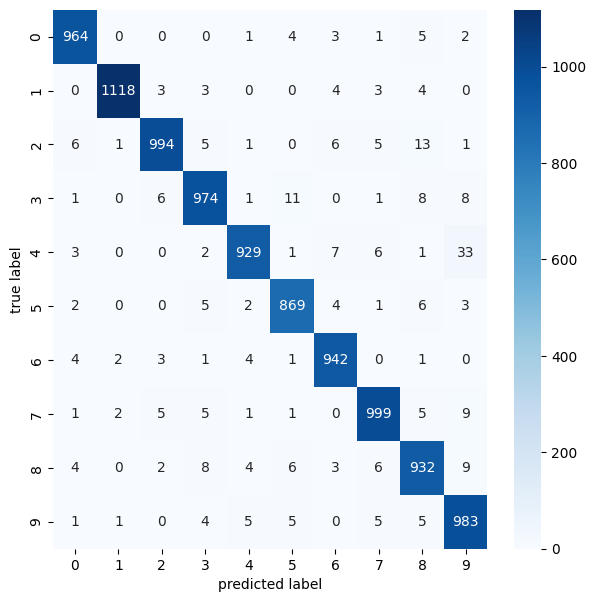

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 모델의 예측 결과
results = model.predict(x_test)
# 혼동 행렬 heatmap
plt.figure(figsize=(7,7))
cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(results, axis=1))
sns.heatmap(cm, annot=True, fmt = 'd', cmap= 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

### 다중 분류 모델 평가 방법2 - 분류 보고서


In [ ]:
# precision 정밀도(모델이 예측한 정답중에 실제 정답 비율) 스팸메일, 추천하는거 ,정리해주는거, 분류해주는거 ,정밀도 높은거
# recall 재현율 (실제 정답중에 모델이 예측한 정답 비율) recall 이 높은걸 선택 생명과 관련된 예측은 리콜
print(classification_report(np.argmax(y_test, axis=1),np.argmax(results, axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.98      0.95      0.96       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.95      0.96      0.95       974
           9       0.94      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

